# (sFigure8)-The Developmental Trajectories of CD4+ and CD8+ T Cells.

In [1]:
import omicverse as ov
import scanpy as sc
import pandas as pd
import numpy as np


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.10, Tutorials: https://omicverse.readthedocs.io/


In [2]:
import os
from matplotlib import rcParams
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
font_path = 'Gastric/Arial.ttf'
front_prop = FontProperties(fname=font_path)

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

In [3]:
adata_CD8 = sc.read_h5ad('Gastric/Data/NKT/CD8_anno_new.h5ad')
adata_CD8.uns['Subcelltype_colors'] = ov.pl.green_color[0:4] + ov.pl.red_color[0:4] +  ov.pl.blue_color[0:4]
adata_CD8

AnnData object with n_obs × n_vars = 6184 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
adata_raw = sc.read_h5ad('Gastric/Data/Gastric_Origin.h5ad')


In [5]:
adata_CD8_raw = adata_raw[adata_CD8.obs.index]
adata_CD8_raw.obs = adata_CD8.obs
adata_CD8_raw.uns = adata_CD8.uns
adata_CD8_raw.obsm = adata_CD8.obsm
adata_CD8_raw

AnnData object with n_obs × n_vars = 6184 × 32559
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

# PAGA

In [6]:
adata_CD8.obs['clusters'] = adata_CD8.obs['Subcelltype']
Traj=ov.single.TrajInfer(adata_CD8,basis='X_umap',use_rep='X_scVI',n_comps=10)
Traj.set_origin_cells('CD8.GZMK+.Tn')
Traj.inference(method='diffusion_map')

computing neighbors


2024-05-28 11:13:07.277772: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-28 11:13:07.403314: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-28 11:13:08.146363: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/opt/slurm/lib/slurm:
2024-05-28 11:13:08.146572: W tensorflow/compiler/

    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9602898  0.9591224  0.93890196 0.9296711  0.92271674
     0.91347533 0.9047069  0.90049803 0.8954998  0.89141953 0.8870985
     0.8864504  0.8821082  0.8775621 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:38)
computing Diffusion Pseudotime using n_d

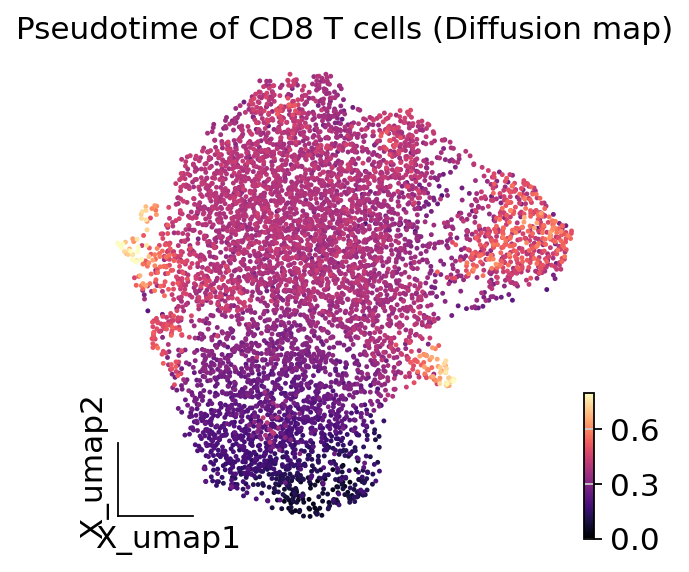

In [47]:
fig, ax = plt.subplots(figsize=(4,4))

ov.utils.embedding(adata_CD8,basis='X_umap',
                   color=['dpt_pseudotime'],title='Pseudotime of CD8 T cells (Diffusion map)',vmax=0.8,show=False,
                   frameon='small',cmap='magma',ax=ax)
plt.savefig("Gastric/Figure/sFigure8/Figure7_A.png",dpi=300,bbox_inches = 'tight')

running PAGA using priors: ['dpt_pseudotime']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


[rank: 0] Global seed set to 0


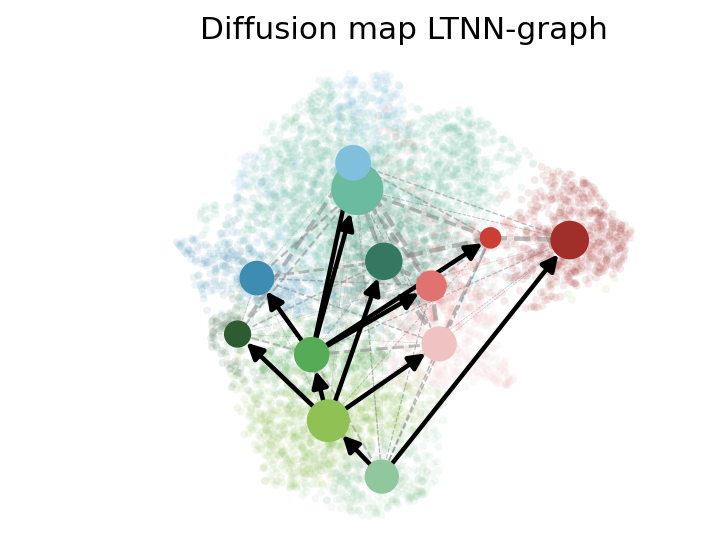

In [8]:
ov.utils.cal_paga(adata_CD8,use_time_prior='dpt_pseudotime',vkey='paga',
                 groups='Subcelltype')

ov.utils.plot_paga(adata_CD8,basis='umap', size=50, alpha=.1,title='Diffusion map LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False,figsize=(4,4))
plt.savefig("Gastric/Figure/sFigure8/Figure7_B.png",dpi=300,bbox_inches = 'tight')

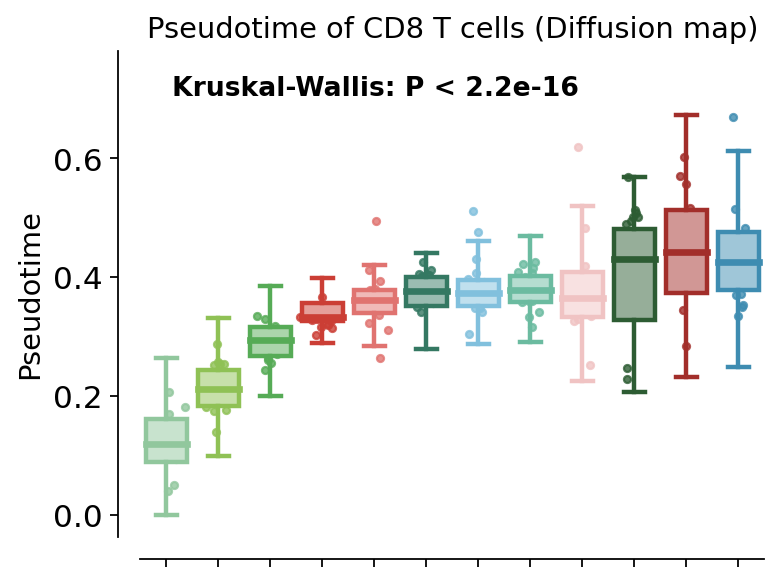

In [11]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')

ov.pl.single_group_boxplot(adata_CD8,groupby='Subcelltype',
             color='dpt_pseudotime',
             type_color_dict=dict(zip(pd.Categorical(adata_CD8.obs['Subcelltype']).categories, adata_CD8.uns['Subcelltype_colors'])),
             x_ticks_plot=False,
             figsize=(5,4),
             kruskal_test=True,
             ylabel='Pseudotime',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Pseudotime of CD8 T cells (Diffusion map)',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=False,
             )
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)
plt.savefig("Gastric/Figure/sFigure8/Figure7_C.png",dpi=300,bbox_inches = 'tight')

# palantir

In [13]:
adata_CD8.obs['clusters'] = adata_CD8.obs['Subcelltype']
Traj=ov.single.TrajInfer(adata_CD8,basis='X_umap',use_rep='X_scVI',n_comps=10)
Traj.set_origin_cells('CD8.GZMK+.Tn')
Traj.set_terminal_cells(['CD8.MAIT','CD8.CXCL13+.Termianl_Tex','CD8.KLRD1+TYROBP+.NK-like',])
Traj.inference(method='palantir',num_waypoints=500)


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
**finished identifying marker genes by COSG**
Sampling and flocking waypoints...
Time for determining waypoints: 0.006835063298543294 minutes
Determining pseudotime...
Shortest path distances using 30-nearest neighbor graph...

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (_

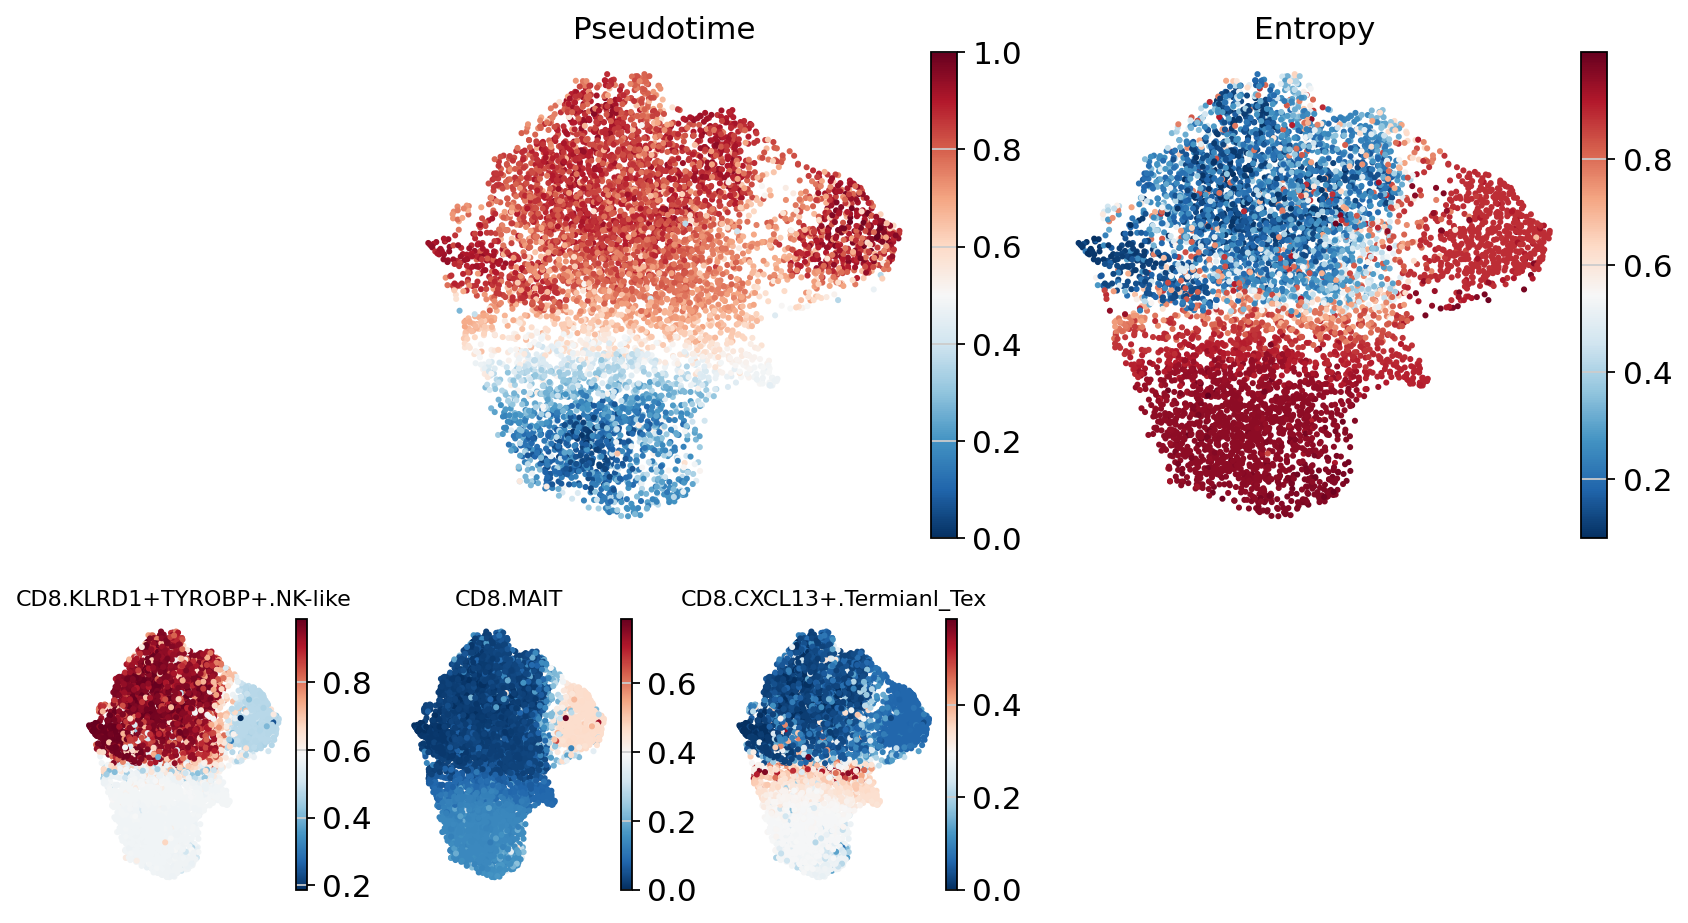

In [14]:
ax = Traj.palantir_plot_pseudotime(embedding_basis='X_umap',cmap='RdBu_r',s=3)

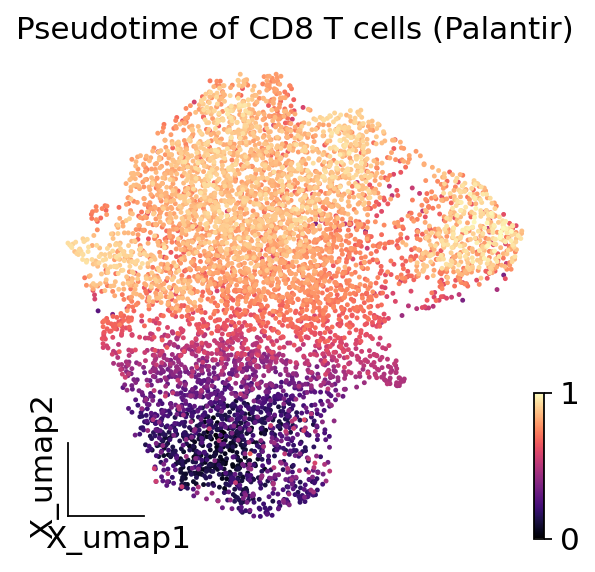

In [23]:
fig, ax = plt.subplots(figsize=(4,4))

ov.utils.embedding(adata_CD8,basis='X_umap',
                   color=['palantir_pseudotime'],title='Pseudotime of CD8 T cells (Palantir)',show=False,
                   frameon='small',cmap='magma',ax=ax)
plt.savefig("Gastric/Figure/sFigure8/Figure8_D.png",dpi=300,bbox_inches = 'tight')

running PAGA using priors: ['palantir_pseudotime']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


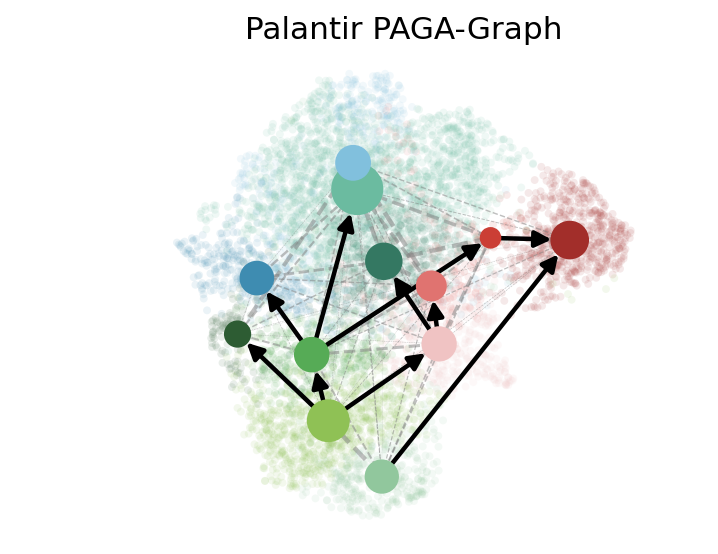

In [16]:
ov.utils.cal_paga(adata_CD8,use_time_prior='palantir_pseudotime',vkey='paga',
                 groups='Subcelltype')

ov.utils.plot_paga(adata_CD8,basis='umap', size=50, alpha=.1,title='Palantir PAGA-Graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False,figsize=(4,4))
plt.savefig("Gastric/Figure/sFigure8/Figure8_E.png",dpi=300,bbox_inches = 'tight')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, ''),
  Text(1, 0, ''),
  Text(2, 0, ''),
  Text(3, 0, ''),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, '')])

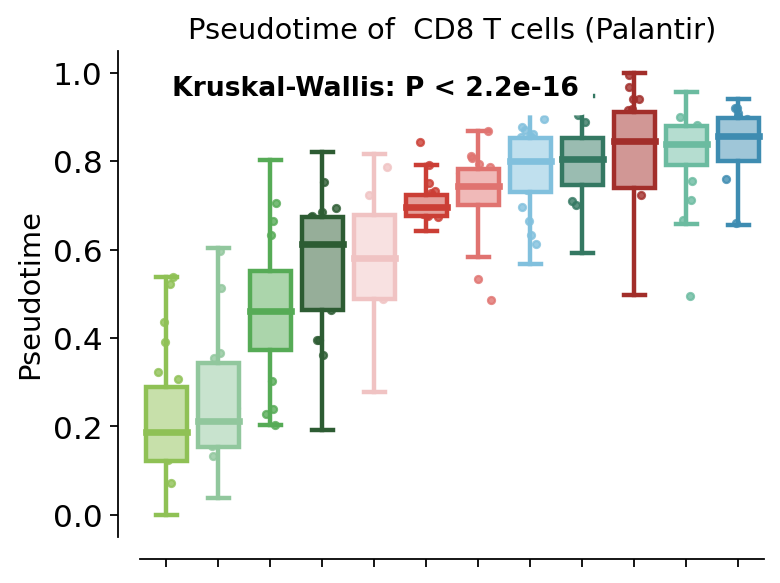

In [17]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')

ov.pl.single_group_boxplot(adata_CD8,groupby='Subcelltype',
             color='palantir_pseudotime',
             type_color_dict=dict(zip(pd.Categorical(adata_CD8.obs['Subcelltype']).categories, adata_CD8.uns['Subcelltype_colors'])),
             x_ticks_plot=False,
             figsize=(5,4),
             kruskal_test=True,
             ylabel='Pseudotime',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Pseudotime of  CD8 T cells (Palantir)',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=False,
             )
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)

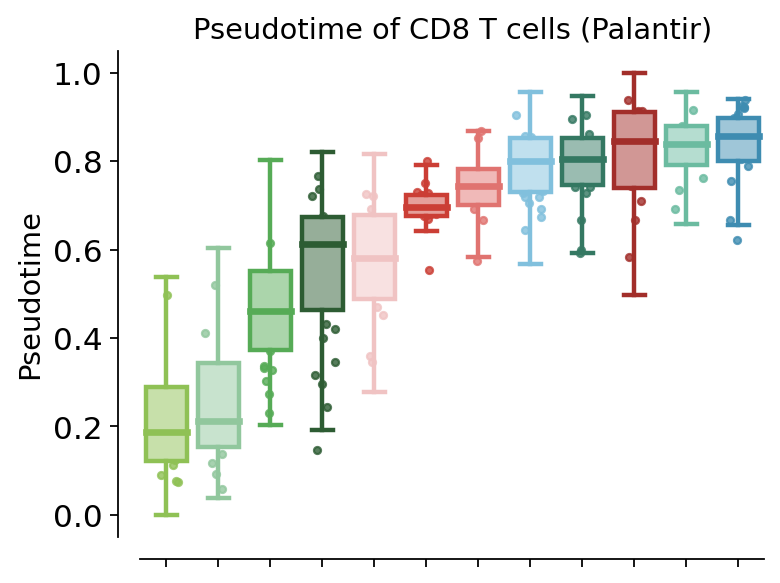

In [18]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')

ov.pl.single_group_boxplot(adata_CD8,groupby='Subcelltype',
             color='palantir_pseudotime',
             type_color_dict=dict(zip(pd.Categorical(adata_CD8.obs['Subcelltype']).categories, adata_CD8.uns['Subcelltype_colors'])),
             x_ticks_plot=False,
             figsize=(5,4),
             kruskal_test=False,
             ylabel='Pseudotime',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Pseudotime of CD8 T cells (Palantir)',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=False,
             )
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)
plt.savefig("Gastric/Figure/sFigure8/Figure8_F.png",dpi=300,bbox_inches = 'tight')

In [19]:
help(ov.pl.single_group_boxplot)

Help on function single_group_boxplot in module omicverse.pl._single:

single_group_boxplot(adata, groupby: str = '', color: str = '', type_color_dict: dict = None, title: str = '', ylabel: str = '', kruskal_test: bool = False, figsize: tuple = (4, 4), x_ticks_plot: bool = False, legend_plot: bool = True, bbox_to_anchor: tuple = (1, 0.55), save: bool = False, point_number: int = 5, save_pathway: str = '', sort: bool = True, scatter_kwargs: dict = None, ax=None, fontsize=12)
    adata (AnnData object): The data object containing the information for plotting.
    groupby (str): The variable used for grouping the data.
    color (str): The variable used for coloring the data points.
    type_color_dict (dict): A dictionary mapping group categories to specific colors.
    title (str): The title for the plot.
    ylabel (str): The label for the y-axis.
    kruskal_test (bool): Whether to perform a Kruskal-Wallis test and display the p-value on the plot.
    figsize (tuple): The size of the 

# PyVIA of CD8 T cells

In [20]:
v0 = ov.single.pyVIA(adata=adata_CD8,adata_key='X_scVI',adata_ncomps=10, basis='X_umap',
                    resolution_parameter=0.6,clusters='Subcelltype',knn=50,random_seed=4,root_user=['CD8.GZMK+.Tn'])

v0.run()

2024-05-28 11:39:06.251721	Running VIA over input data of 6184 (samples) x 10 (features)
2024-05-28 11:39:06.251890	Knngraph has 50 neighbors
2024-05-28 11:39:09.485144	Finished global pruning of 50-knn graph used for clustering at level of 0.15. Kept 47.0 % of edges. 
2024-05-28 11:39:09.520748	Number of connected components used for clustergraph  is 1
2024-05-28 11:39:10.035558	Commencing community detection
2024-05-28 11:39:10.809117	Finished running Leiden algorithm. Found 12 clusters.
2024-05-28 11:39:10.811200	Merging 1 very small clusters (<10)
2024-05-28 11:39:10.812157	Finished detecting communities. Found 11 communities
2024-05-28 11:39:10.812466	Making cluster graph. Global cluster graph pruning level: 0.15
2024-05-28 11:39:10.833159	Graph has 1 connected components before pruning
2024-05-28 11:39:10.834415	Graph has 1 connected components after pruning
2024-05-28 11:39:10.834553	Graph has 1 connected components after reconnecting
2024-05-28 11:39:10.834963	0.0% links trimme

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


2024-05-28 11:39:23.420447	Super cluster 2 is a super terminal with sub_terminal cluster 8
2024-05-28 11:39:23.420500	Super cluster 4 is a super terminal with sub_terminal cluster 2
2024-05-28 11:39:23.420514	Super cluster 5 is a super terminal with sub_terminal cluster 4
2024-05-28 11:39:23.420526	Super cluster 8 is a super terminal with sub_terminal cluster 5


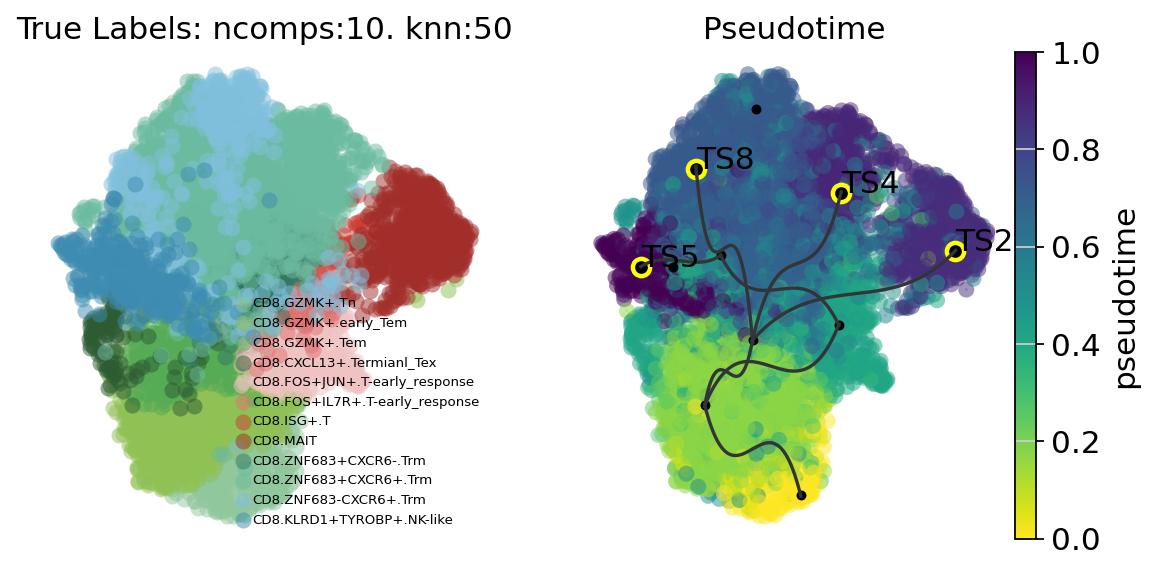

In [21]:
fig,ax1,ax2=v0.plot_trajectory_gams(basis='X_umap',clusters='Subcelltype',draw_all_curves=False)
#fig.savefig('figures/via_fig3.png',dpi=300,bbox_inches = 'tight')

...the pseudotime of VIA added to AnnData obs named `pt_via`


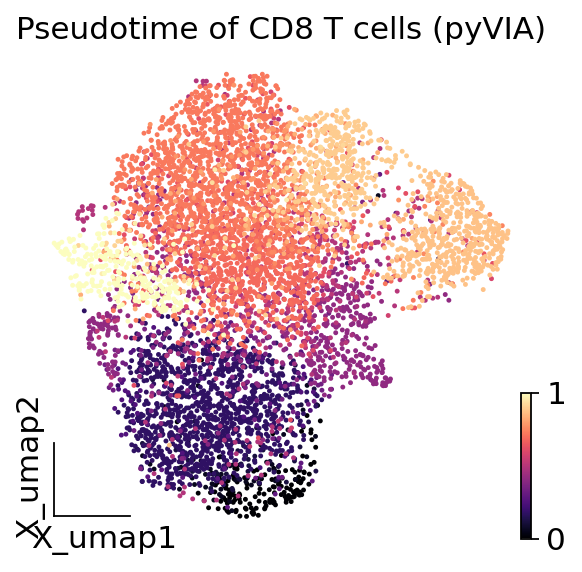

In [25]:
fig, ax = plt.subplots(figsize=(4,4))
v0.get_pseudotime(v0.adata)
ov.utils.embedding(adata_CD8,basis='X_umap',
                   color=['pt_via'],title='Pseudotime of CD8 T cells (pyVIA)',show=False,
                   frameon='small',cmap='magma',ax=ax)
plt.savefig("Gastric/Figure/sFigure8/Figure8_G.png",dpi=300,bbox_inches = 'tight')

running PAGA using priors: ['pt_via']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


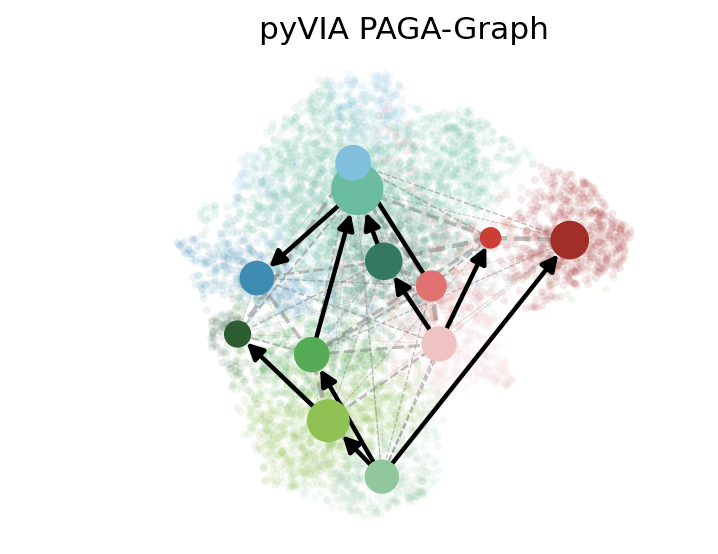

In [26]:
ov.utils.cal_paga(adata_CD8,use_time_prior='pt_via',vkey='paga',
                 groups='Subcelltype')

ov.utils.plot_paga(adata_CD8,basis='umap', size=50, alpha=.1,title='pyVIA PAGA-Graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False,figsize=(4,4))
plt.savefig("Gastric/Figure/sFigure8/Figure8_H.png",dpi=300,bbox_inches = 'tight')

...the pseudotime of VIA added to AnnData obs named `pt_via`


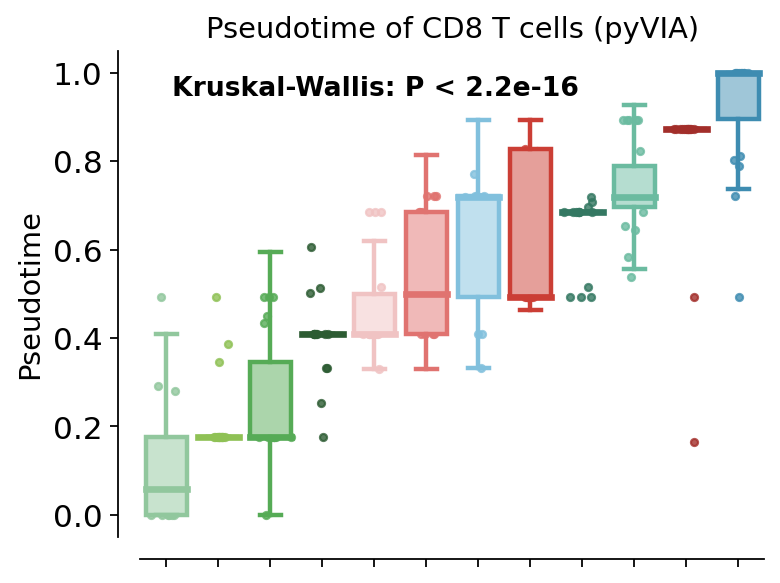

In [27]:
v0.get_pseudotime(v0.adata)
import pandas as pd
import seaborn as sns
#sns.set_style('white')


ov.pl.single_group_boxplot(adata_CD8,groupby='Subcelltype',
             color='pt_via',
             type_color_dict=dict(zip(pd.Categorical(adata_CD8.obs['Subcelltype']).categories, adata_CD8.uns['Subcelltype_colors'])),
             x_ticks_plot=False,
             figsize=(5,4),
             kruskal_test=True,
             ylabel='Pseudotime',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Pseudotime of CD8 T cells (pyVIA)',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=False,
             )
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)
plt.savefig("Gastric/Figure/sFigure8/Figure8_I.png",dpi=300,bbox_inches = 'tight')

# CD4 T cells

In [29]:
adata_CD4 = sc.read_h5ad('Gastric/Data/NKT/CD4_anno_new.h5ad')
adata_CD4

AnnData object with n_obs × n_vars = 6816 × 2000
    obs: 'Group_number', 'Sample', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', '_scvi_batch', '_scvi_labels', 'leiden', 'major_celltype', 'Person', 'T/NK_celltype', 'T/NK_type', 'Subcelltype'
    uns: 'Person_colors', 'Sample_colors', 'Subcelltype_colors', 'T', 'dendrogram_T', 'dendrogram_leiden', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

# PAGA

In [30]:
adata_CD4.obs['clusters'] = adata_CD4.obs['Subcelltype']
Traj=ov.single.TrajInfer(adata_CD4,basis='X_umap',use_rep='X_scVI',n_comps=10)
Traj.set_origin_cells('CD4.Tn')
Traj.inference(method='diffusion_map')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.9537168  0.9442197  0.93098634 0.92331016 0.92203224
     0.9024178  0.89329493 0.88786286 0.8858119  0.88008213 0.876596
     0.8693005  0.8678484  0.8609628 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
drawing single-cell graph using layout 'fa'
    finished: added
    'X_draw_graph_fr', graph_drawing coordinates (adata.obsm) (0:00:47)
computing Diffusion P

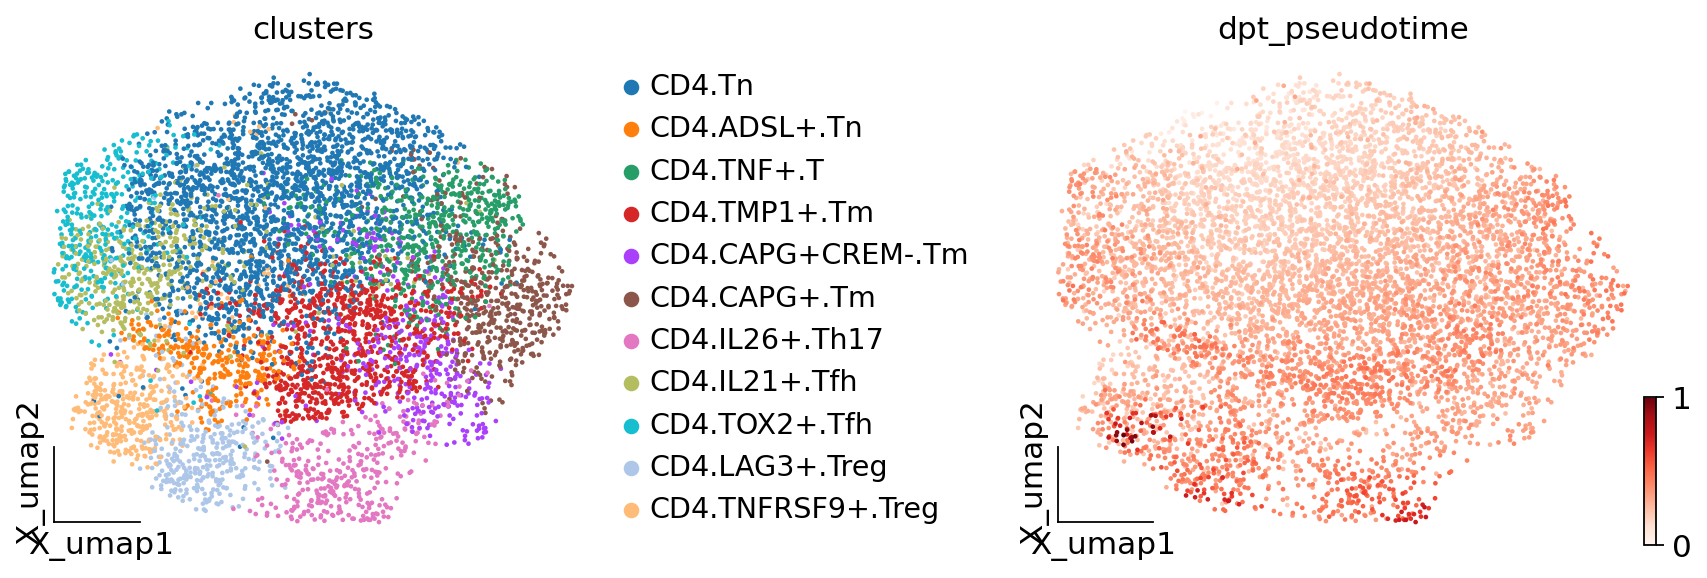

In [31]:
ov.utils.embedding(adata_CD4,basis='X_umap',
                   color=['clusters','dpt_pseudotime'],
                   frameon='small',cmap='Reds',wspace=0.6)

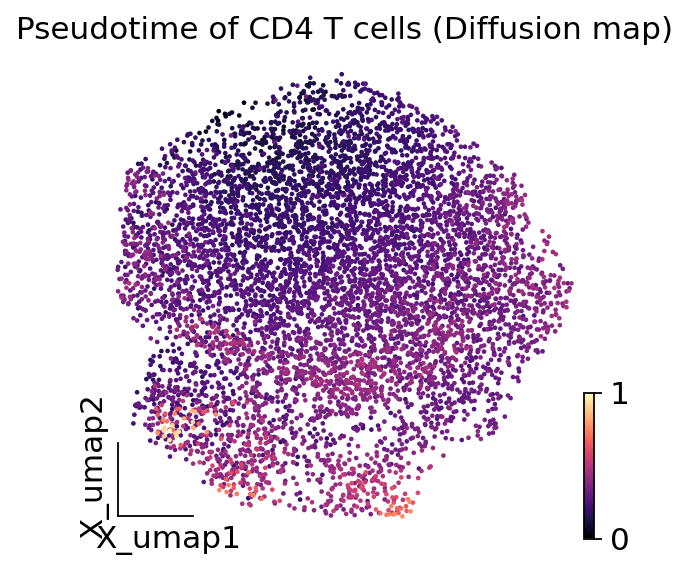

In [46]:
fig, ax = plt.subplots(figsize=(4,4))

ov.utils.embedding(adata_CD4,basis='X_umap',
                   color=['dpt_pseudotime'],title='Pseudotime of CD4 T cells (Diffusion map)',show=False,
                   frameon='small',cmap='magma',ax=ax)
plt.savefig("Gastric/Figure/sFigure8/Figure8_A_2.png",dpi=300,bbox_inches = 'tight')

running PAGA 
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


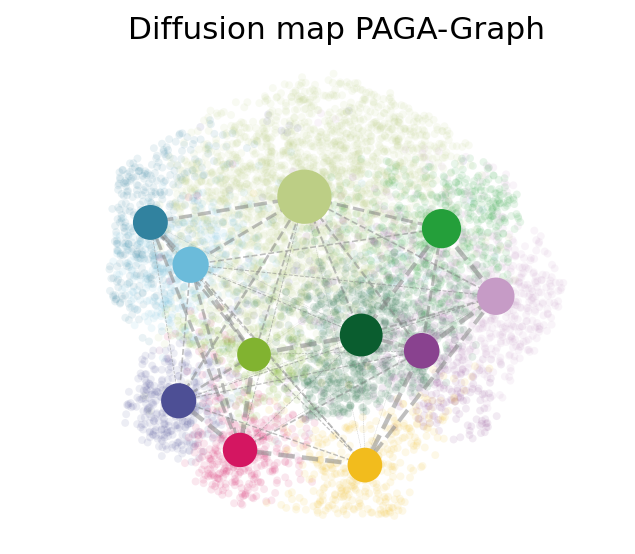

In [33]:
ov.utils.cal_paga(adata_CD4,use_time_prior='pt_via',vkey='paga',
                 groups='Subcelltype')

ov.utils.plot_paga(adata_CD4,basis='umap', size=50, alpha=.1,title='Diffusion map PAGA-Graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False,figsize=(4,4))
plt.savefig("Gastric/Figure/sFigure8/Figure8_B_2.png",dpi=300,bbox_inches = 'tight')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'CD4.Tn'),
  Text(1, 0, 'CD4.IL21+.Tfh'),
  Text(2, 0, 'CD4.TOX2+.Tfh'),
  Text(3, 0, 'CD4.CAPG+CREM-.Tm'),
  Text(4, 0, 'CD4.TNF+.T'),
  Text(5, 0, 'CD4.CAPG+.Tm'),
  Text(6, 0, 'CD4.TNFRSF9+.Treg'),
  Text(7, 0, 'CD4.TMP1+.Tm'),
  Text(8, 0, 'CD4.ADSL+.Tn'),
  Text(9, 0, 'CD4.LAG3+.Treg'),
  Text(10, 0, 'CD4.IL26+.Th17')])

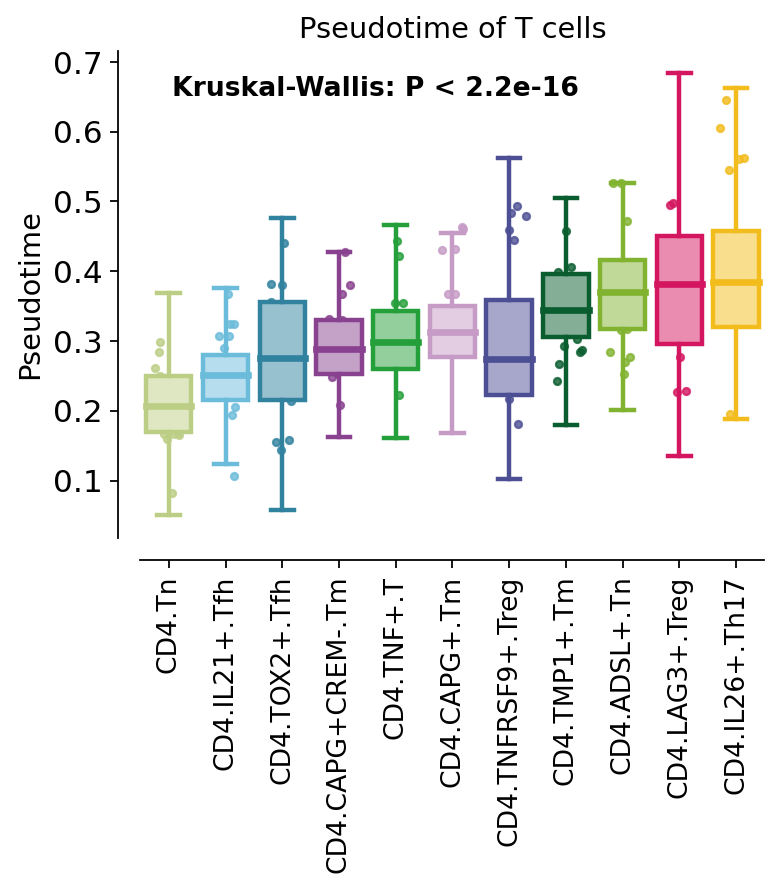

In [34]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')

ov.pl.single_group_boxplot(adata_CD4,groupby='Subcelltype',
             color='dpt_pseudotime',
             type_color_dict=dict(zip(pd.Categorical(adata_CD4.obs['Subcelltype']).categories, adata_CD4.uns['Subcelltype_colors'])),
             x_ticks_plot=True,
             figsize=(5,4),
             kruskal_test=True,
             ylabel='Pseudotime',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Pseudotime of T cells',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=False,
             )
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)

In [35]:
adata_CD4.obs['clusters'] = adata_CD4.obs['Subcelltype']
Traj=ov.single.TrajInfer(adata_CD4,basis='X_umap',use_rep='X_scVI',n_comps=10)
Traj.set_origin_cells('CD4.Tn')
Traj.set_terminal_cells(['CD4.LAG3+.Treg','CD4.IL26+.Th17','CD4.TOX2+.Tfh'])
Traj.inference(method='palantir',num_waypoints=500)


computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.10, Tutorials: https://omicverse.readthedocs.io/

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.5.10, Tutorials: https://omicverse.readthedocs.io/

   ____            _     _    __                  
  / __ \____ ___  (_)__

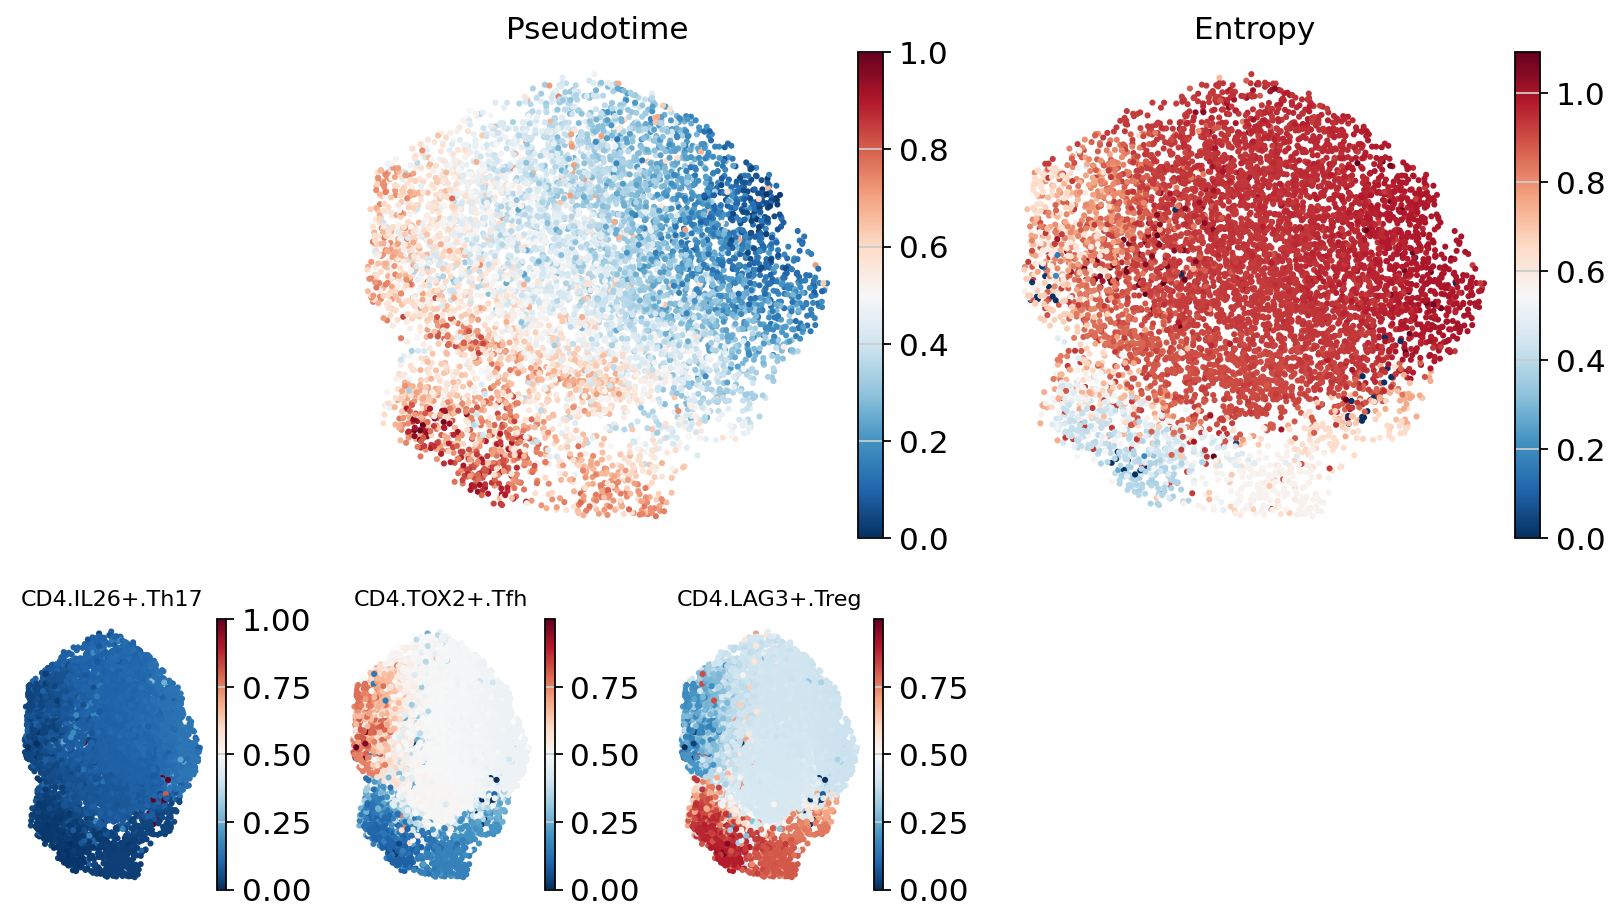

In [36]:
Traj.palantir_plot_pseudotime(embedding_basis='X_umap',cmap='RdBu_r',s=3)

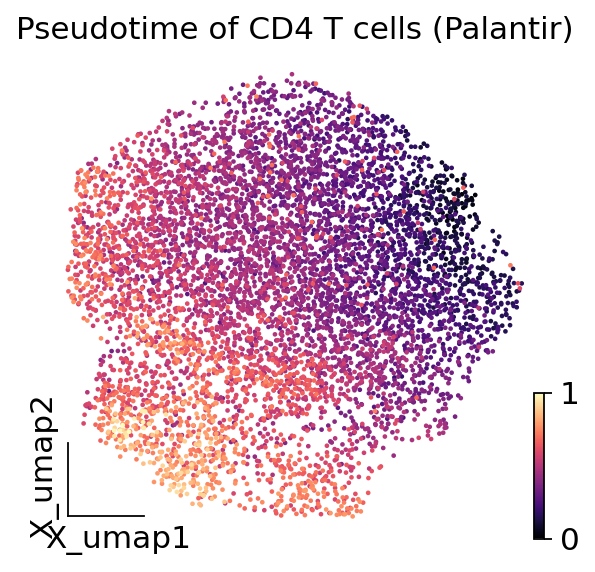

In [37]:
fig, ax = plt.subplots(figsize=(4,4))

ov.utils.embedding(adata_CD4,basis='X_umap',
                   color=['palantir_pseudotime'],title='Pseudotime of CD4 T cells (Palantir)',show=False,
                   frameon='small',cmap='magma',ax=ax)
plt.savefig("Gastric/Figure/sFigure8/Figure8_D_2.png",dpi=300,bbox_inches = 'tight')

running PAGA using priors: ['palantir_pseudotime']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


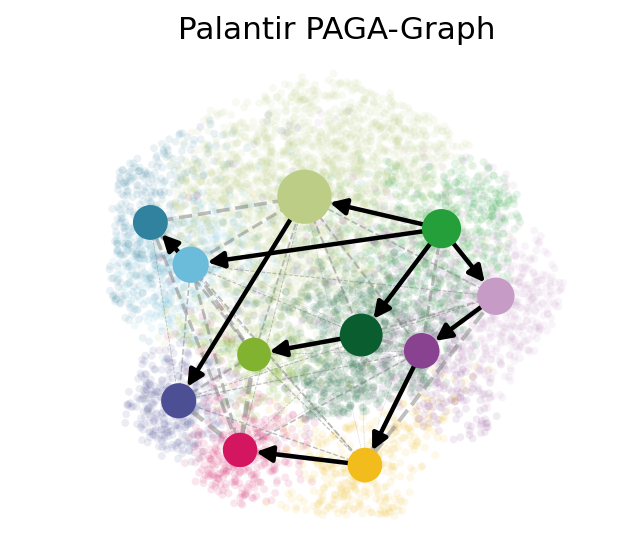

In [38]:
ov.utils.cal_paga(adata_CD4,use_time_prior='palantir_pseudotime',vkey='paga',
                 groups='Subcelltype')
ov.utils.plot_paga(adata_CD4,basis='umap', size=50, alpha=.1,title='Palantir PAGA-Graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
plt.savefig("Gastric/Figure/sFigure8/Figure8_E_2.png",dpi=300,bbox_inches = 'tight')

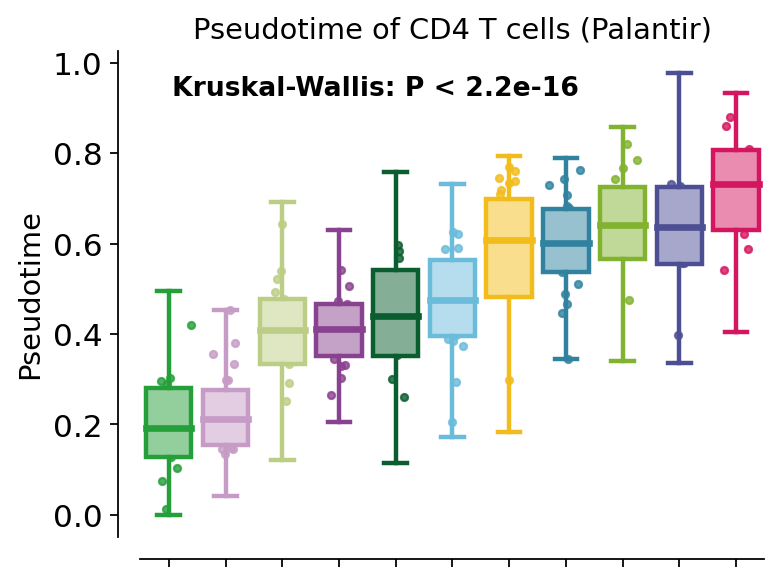

In [39]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')

ov.pl.single_group_boxplot(adata_CD4,groupby='Subcelltype',
             color='palantir_pseudotime',
             type_color_dict=dict(zip(pd.Categorical(adata_CD4.obs['Subcelltype']).categories, adata_CD4.uns['Subcelltype_colors'])),
             x_ticks_plot=False,
             figsize=(5,4),
             kruskal_test=True,
             ylabel='Pseudotime',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Pseudotime of CD4 T cells (Palantir)',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=False,
             )
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)
plt.savefig("Gastric/Figure/sFigure8/Figure8_F_2.png",dpi=300,bbox_inches = 'tight')

# PyVIA

In [40]:
v0 = ov.single.pyVIA(adata=adata_CD4,adata_key='X_scVI',adata_ncomps=80, basis='X_umap',
                         clusters='Subcelltype',knn=30,random_seed=4,root_user=['CD4.Tn'],)

v0.run()

2024-05-28 11:42:11.788553	Running VIA over input data of 6816 (samples) x 10 (features)
2024-05-28 11:42:11.788754	Knngraph has 30 neighbors
2024-05-28 11:42:15.016200	Finished global pruning of 30-knn graph used for clustering at level of 0.15. Kept 47.7 % of edges. 
2024-05-28 11:42:15.049595	Number of connected components used for clustergraph  is 1
2024-05-28 11:42:15.336580	Commencing community detection
2024-05-28 11:42:15.980039	Finished running Leiden algorithm. Found 28 clusters.
2024-05-28 11:42:15.981694	Merging 12 very small clusters (<10)
2024-05-28 11:42:15.982937	Finished detecting communities. Found 16 communities
2024-05-28 11:42:15.983277	Making cluster graph. Global cluster graph pruning level: 0.15
2024-05-28 11:42:15.998963	Graph has 1 connected components before pruning
2024-05-28 11:42:16.000277	Graph has 1 connected components after pruning
2024-05-28 11:42:16.000410	Graph has 1 connected components after reconnecting
2024-05-28 11:42:16.000831	0.0% links trimm

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


2024-05-28 11:42:27.221847	Super cluster 6 is a super terminal with sub_terminal cluster 6
2024-05-28 11:42:27.221903	Super cluster 8 is a super terminal with sub_terminal cluster 8
2024-05-28 11:42:27.221918	Super cluster 9 is a super terminal with sub_terminal cluster 9
2024-05-28 11:42:27.221931	Super cluster 13 is a super terminal with sub_terminal cluster 13
2024-05-28 11:42:27.221942	Super cluster 14 is a super terminal with sub_terminal cluster 14


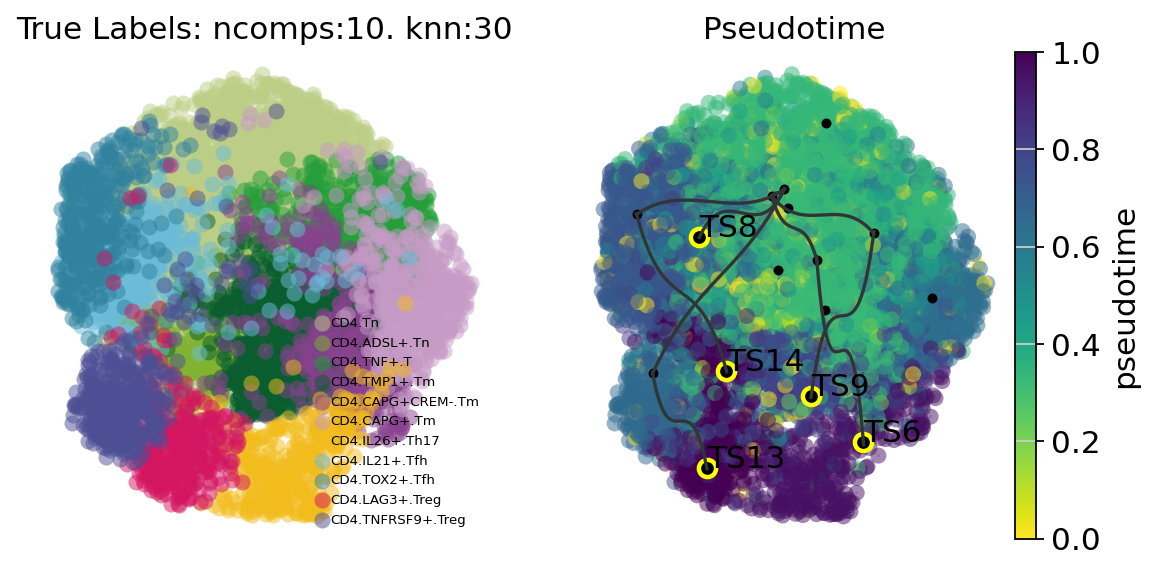

In [41]:
fig,ax1,ax2=v0.plot_trajectory_gams(basis='X_umap',clusters='Subcelltype',draw_all_curves=False)
#fig.savefig('figures/via_fig3.png',dpi=300,bbox_inches = 'tight')

...the pseudotime of VIA added to AnnData obs named `pt_via`


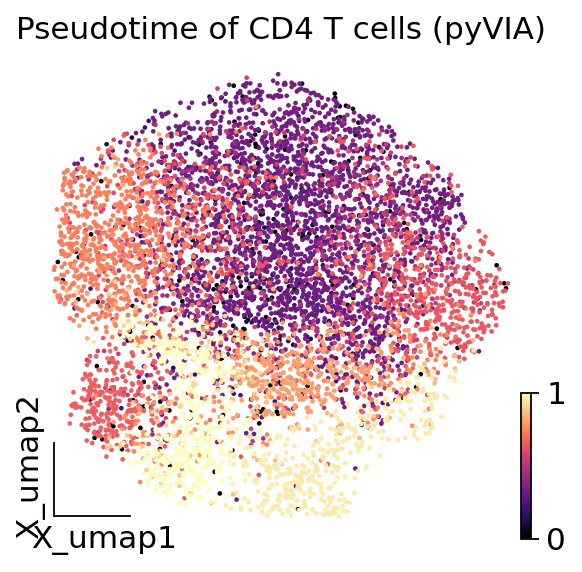

In [48]:
fig, ax = plt.subplots(figsize=(4,4))
v0.get_pseudotime(v0.adata)

ov.utils.embedding(adata_CD4,basis='X_umap',
                   color=['pt_via'],title='Pseudotime of CD4 T cells (pyVIA)',show=False,
                   frameon='small',cmap='magma',ax=ax)
plt.savefig("Gastric/Figure/sFigure8/Figure8_G_2.png",dpi=300,bbox_inches = 'tight')

running PAGA using priors: ['pt_via']
    finished
added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


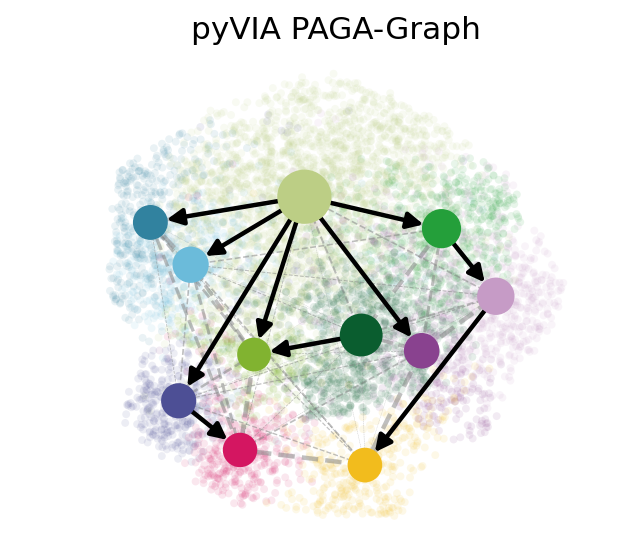

In [44]:
ov.utils.cal_paga(adata_CD4,use_time_prior='pt_via',vkey='paga',
                 groups='Subcelltype')

ov.utils.plot_paga(adata_CD4,basis='umap', size=50, alpha=.1,title='pyVIA PAGA-Graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False,figsize=(4,4))
plt.savefig("Gastric/Figure/sFigure8/Figure8_H_2.png",dpi=300,bbox_inches = 'tight')

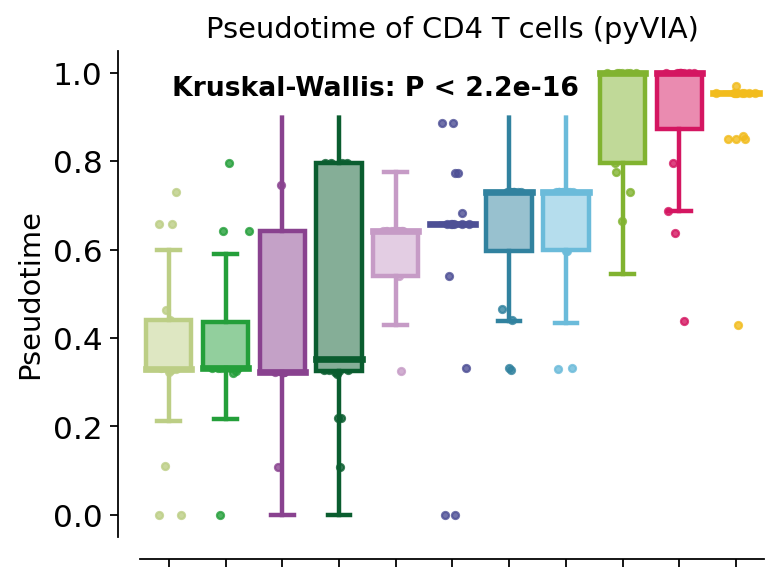

In [45]:
import pandas as pd
import seaborn as sns
#sns.set_style('white')


ov.pl.single_group_boxplot(adata_CD4,groupby='Subcelltype',
             color='pt_via',
             type_color_dict=dict(zip(pd.Categorical(adata_CD4.obs['Subcelltype']).categories, adata_CD4.uns['Subcelltype_colors'])),
             x_ticks_plot=False,
             figsize=(5,4),
             kruskal_test=True,
             ylabel='Pseudotime',
             legend_plot=False,
             bbox_to_anchor=(1,1),
             title='Pseudotime of CD4 T cells (pyVIA)',
             scatter_kwargs={'alpha':0.8,'s':10,'marker':'o'},
             point_number=15,
             sort=True,
             save=False,
             )
plt.grid(False)
plt.xticks(rotation=90,fontsize=12)
plt.savefig("Gastric/Figure/sFigure8/Figure8_I_2.png",dpi=300,bbox_inches = 'tight')